In [7]:
%matplotlib inline

import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

#from qiime.parse import parse_mapping_file
#from qiime.format import format_mapping_file
from skbio.io.util import open_file
import scipy.stats 
plt.rcParams['figure.figsize'] = (20.0, 20.0)
sns.set(font_scale=1)

In [8]:
mapping=pd.read_table("../data/ag235_w_scores_alpha.txt", dtype=str)
mapping=mapping.set_index("#SampleID")

In [9]:
print(mapping.shape)

(235, 496)


In [10]:
mapping['bin_bdi21_score']=pd.to_numeric(mapping['bin_bdi21_score'])
mapping["PD_whole_tree_even_10000_normalized_alpha"]=pd.to_numeric(mapping["PD_whole_tree_even_10000_normalized_alpha"])
mapping['chao1_even_10000_normalized_alpha']=pd.to_numeric(mapping['chao1_even_10000_normalized_alpha'])
mapping['observed_otus_even_10000_normalized_alpha']=pd.to_numeric(mapping['observed_otus_even_10000_normalized_alpha'])

In [11]:
def bdibinalpha(alphametric):
    '''return alpha div values of samples belonging to each of the 4 bdi bins as separate lists'''
    bdi1=[]
    bdi2=[]
    bdi3=[]
    bdi4=[]
    for samp in mapping.index:
        if mapping.ix[samp, "bin_bdi21_score"]==1:
            bdi1.append(mapping.ix[samp, alphametric])
        if mapping.ix[samp, "bin_bdi21_score"]==2:
            bdi2.append(mapping.ix[samp, alphametric])
        if mapping.ix[samp, "bin_bdi21_score"]==3:
            bdi3.append(mapping.ix[samp, alphametric])
        if mapping.ix[samp, "bin_bdi21_score"]==4:
            bdi4.append(mapping.ix[samp, alphametric])
    return [bdi1,bdi2,bdi3,bdi4]

# PD whole tree 

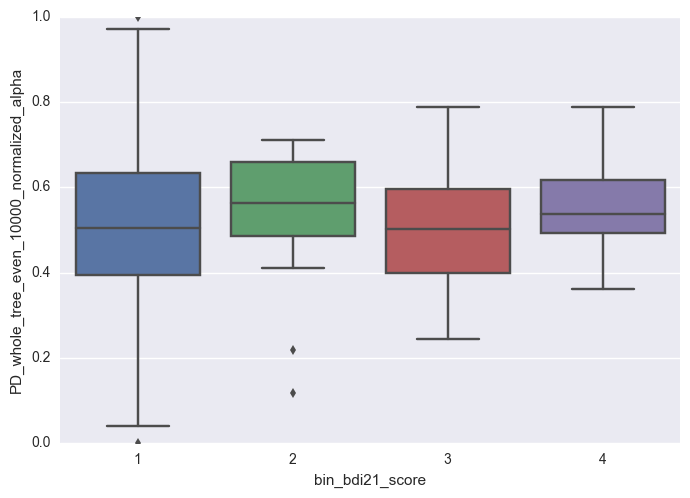

In [37]:
sns.boxplot(x='bin_bdi21_score', y='PD_whole_tree_even_10000_normalized_alpha', data=mapping)
plt.savefig("../figures/alpha_compare_all_PD.pdf")

In [13]:
alphalistPD=bdibinalpha('PD_whole_tree_even_10000_normalized_alpha')
scipy.stats.mstats.kruskalwallis(alphalistPD[0],alphalistPD[3]) #p values between bdi 1 and 4 PD values

/Users/priya/anaconda2/envs/gneiss_env/lib/python3.5/site-packages/scipy/stats/mstats_basic.py:134: RuntimeWarning: invalid value encountered in isfinite
  output[np.logical_not(np.isfinite(output._data))] = masked


KruskalResult(statistic=0.72151720082331394, pvalue=0.39564669031112898)

# Chao1

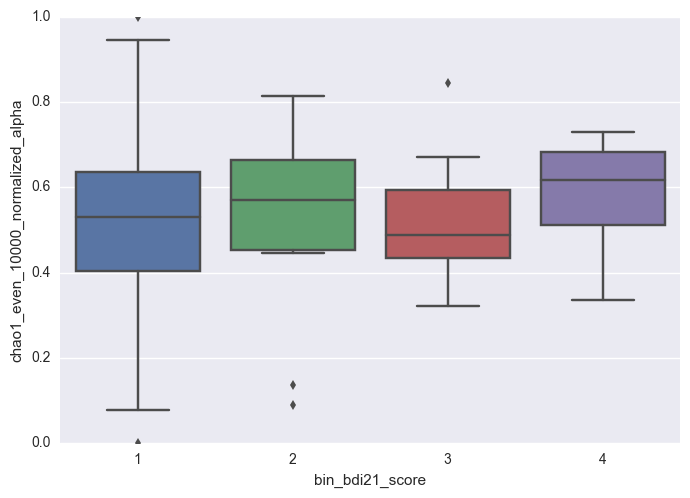

In [38]:
sns.boxplot(x='bin_bdi21_score', y='chao1_even_10000_normalized_alpha', data=mapping)
plt.savefig("../figures/alpha_compare_all_chao1.pdf")

In [15]:
alphalistchao=bdibinalpha('chao1_even_10000_normalized_alpha')
scipy.stats.mstats.kruskalwallis(alphalistchao[0],alphalistchao[3]) #p values between bdi 1 and 4 PD values

KruskalResult(statistic=1.948544545721802, pvalue=0.16274377615053925)

# Observed otus

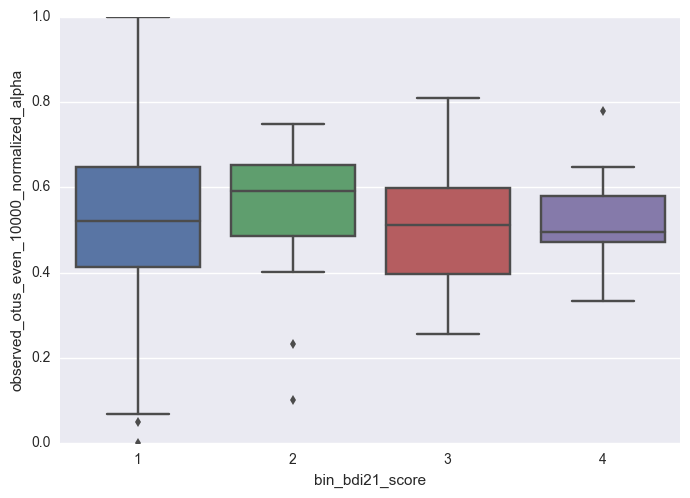

In [39]:
sns.boxplot(x='bin_bdi21_score', y='observed_otus_even_10000_normalized_alpha', data=mapping)
plt.savefig("../figures/alpha_compare_all_notus.pdf")

In [135]:
alphalistotu=bdibinalpha('observed_otus_even_10000_normalized_alpha')
scipy.stats.mstats.kruskalwallis(alphalistotu[0],alphalistotu[3]) #p values between bdi 1 and 4 PD values

# Comparing alpha b/w bdi bin=1 and bdi bin=4

In [29]:
extremes=pd.read_table("../data/ag34_w_scores_alpha_extremes.txt", dtype=str)

In [31]:
extremes['bin_bdi21_score']=pd.to_numeric(extremes['bin_bdi21_score'])
extremes["PD_whole_tree_even_10000_normalized_alpha"]=pd.to_numeric(extremes["PD_whole_tree_even_10000_normalized_alpha"])
extremes['chao1_even_10000_normalized_alpha']=pd.to_numeric(extremes['chao1_even_10000_normalized_alpha'])
extremes['observed_otus_even_10000_normalized_alpha']=pd.to_numeric(extremes['observed_otus_even_10000_normalized_alpha'])

In [32]:
extremes.bin_bdi21_score

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    4
18    4
19    4
20    4
21    4
22    4
23    4
24    4
25    4
26    4
27    4
28    4
29    4
30    4
31    4
32    4
33    4
Name: bin_bdi21_score, dtype: int64

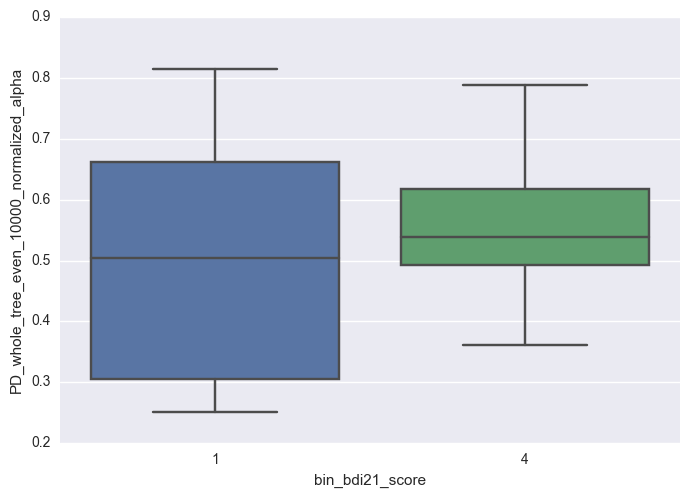

In [40]:
sns.boxplot(x='bin_bdi21_score', y='PD_whole_tree_even_10000_normalized_alpha', data=extremes)
plt.savefig("../figures/alpha_compare_extremes_PD.pdf")

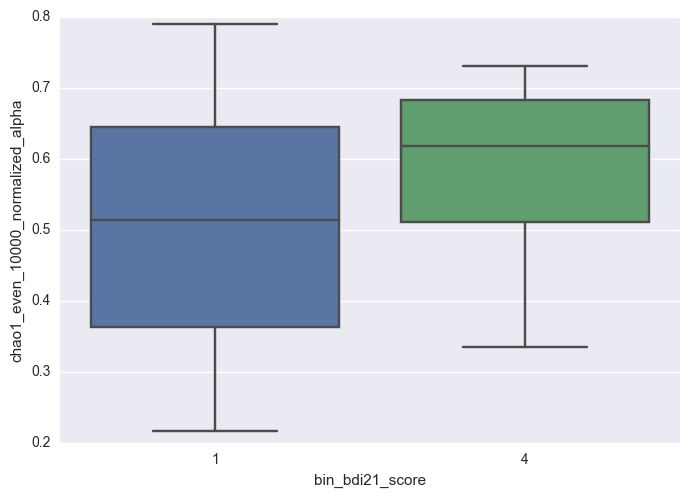

In [41]:
sns.boxplot(x='bin_bdi21_score', y='chao1_even_10000_normalized_alpha', data=extremes)
plt.savefig("../figures/alpha_compare_extremes_PD.pdf")

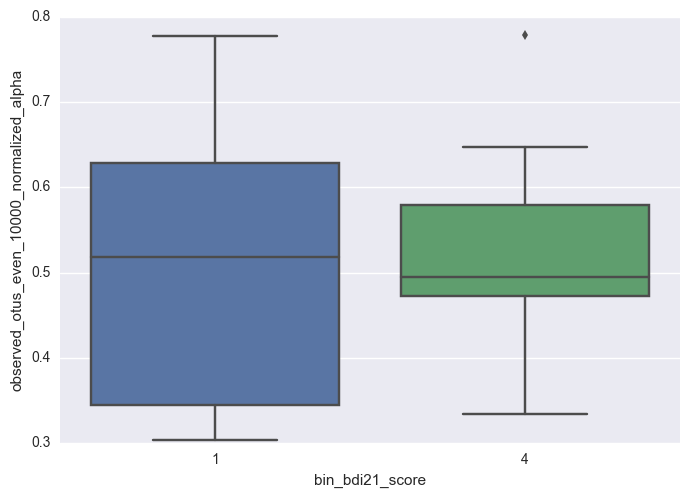

In [42]:
sns.boxplot(x='bin_bdi21_score', y='observed_otus_even_10000_normalized_alpha', data=extremes)
plt.savefig("../figures/alpha_compare_extremes_PD.pdf")